<a href="https://colab.research.google.com/github/Zulfatinnafisah/Kumpulan-Tugas-Kampus-Merdeka/blob/main/Zulfatin_Nafisah_Sertifikasi_Studi_Inpendent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [370]:
#import library numpy dan pandas
import numpy as np
import pandas as pd

In [ ]:
#install library pycaret
!pip install pycaret

In [ ]:
#install library numba
!pip install numba==0.53

In [ ]:
#install library shap
!pip install shap

In [374]:
from pycaret.classification import *

In [375]:
#membuat file excel menjadi bentuk data
data = pd.read_excel('/content/creditapproval-data kotor.xls')
data

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,NaN,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,x4,P,2.0,459168.0,NaN,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,x5,WANITA,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000.0,16.0,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,x763,P,36.0,1000000.0,12.0,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,x764,L,28.0,2000000.0,10.0,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,x765,P,31.0,1312500.0,7.0,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [376]:
#melihat baris dan kolom pada data
data.shape

(766, 16)

In [377]:
#melihat informasi dataset
data.dtypes

nama_nasabah               object
jenis_kelamin              object
umur                      float64
jml_pinjaman              float64
jkw                       float64
jml_angsuran_per_bulan    float64
type_pinjaman               int64
jenis_pinjaman              int64
bi_sektor_ekonomi         float64
col                         int64
bi_golongan_debitur         int64
bi_gol_penjamin             int64
saldo_nominatif           float64
tunggakan_pokok           float64
tunggakan_bunga           float64
status kredit              object
dtype: object

In [378]:
#describe dataset
data.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,757.000000,7.660000e+02,758.000000,7.660000e+02,766.0,766.000000,765.000000,766.000000,766.000000,766.000000,7.660000e+02,7.660000e+02,7.660000e+02
mean,29.073976,2.712483e+06,19.011873,2.333917e+05,100.0,301.197128,6013.045752,1.216710,873.968668,281.300261,2.007386e+06,7.900853e+05,8.771708e+04
std,264.552192,9.995602e+06,32.231431,5.489682e+05,0.0,0.822267,216.196305,0.412273,1.460257,408.099019,8.711282e+06,4.139217e+06,5.682318e+05
min,-7162.000000,8.333333e+04,1.000000,0.000000e+00,100.0,301.000000,6000.000000,1.000000,834.000000,0.000000,-4.000000e+06,0.000000e+00,0.000000e+00
25%,32.000000,8.489286e+05,8.000000,6.750000e+04,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,5.337500e+05,9.885424e+04,0.000000e+00
50%,38.000000,1.500000e+06,12.000000,1.050000e+05,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,9.462828e+05,3.391669e+05,0.000000e+00
75%,43.000000,2.000000e+06,20.000000,2.333334e+05,100.0,301.000000,6000.000000,1.000000,874.000000,875.000000,1.639582e+06,7.500000e+05,5.814889e+04
max,1043.000000,2.286550e+08,679.000000,1.035000e+07,100.0,305.000000,9990.000000,2.000000,876.000000,875.000000,2.094041e+08,9.161212e+07,1.100000e+07


In [379]:
#Melihat nilai null pada dataset
data.isnull().sum()

nama_nasabah              0
jenis_kelamin             0
umur                      9
jml_pinjaman              0
jkw                       8
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

In [380]:
# Mereduce data (untuk mengidentifikasi fitur yang paling penting dalam proses analisis)
apply_data = data.apply(pd.to_numeric, errors='coerce')
apply_data

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,NaN,NaN,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,NaN
1,NaN,NaN,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,NaN
2,NaN,NaN,NaN,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,NaN
3,NaN,NaN,2.0,459168.0,NaN,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,NaN
4,NaN,NaN,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,NaN,NaN,38.0,1000000.0,16.0,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,NaN
762,NaN,NaN,36.0,1000000.0,12.0,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,NaN
763,NaN,NaN,28.0,2000000.0,10.0,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,NaN
764,NaN,NaN,31.0,1312500.0,7.0,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,NaN


In [381]:
#Mereplace/mengganti nilai median pada satu kolom
median = data['umur'].median()
data['umur'].fillna(median,inplace=True)
data

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,38.0,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,x4,P,2.0,459168.0,NaN,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,x5,WANITA,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000.0,16.0,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,x763,P,36.0,1000000.0,12.0,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,x764,L,28.0,2000000.0,10.0,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,x765,P,31.0,1312500.0,7.0,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [382]:
#melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            766 non-null    object 
 1   jenis_kelamin           766 non-null    object 
 2   umur                    766 non-null    float64
 3   jml_pinjaman            766 non-null    float64
 4   jkw                     758 non-null    float64
 5   jml_angsuran_per_bulan  766 non-null    float64
 6   type_pinjaman           766 non-null    int64  
 7   jenis_pinjaman          766 non-null    int64  
 8   bi_sektor_ekonomi       765 non-null    float64
 9   col                     766 non-null    int64  
 10  bi_golongan_debitur     766 non-null    int64  
 11  bi_gol_penjamin         766 non-null    int64  
 12  saldo_nominatif         766 non-null    float64
 13  tunggakan_pokok         766 non-null    float64
 14  tunggakan_bunga         766 non-null    fl

In [383]:
print('Before removing missing values:',len(data))
data.dropna(inplace=True)
print('After removing missing values:',len(data))

Before removing missing values: 766
After removing missing values: 757


In [384]:
#melihat nilai null pada dataset
data.isnull().sum()

nama_nasabah              0
jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         0
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

In [385]:
#melihat informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            757 non-null    object 
 1   jenis_kelamin           757 non-null    object 
 2   umur                    757 non-null    float64
 3   jml_pinjaman            757 non-null    float64
 4   jkw                     757 non-null    float64
 5   jml_angsuran_per_bulan  757 non-null    float64
 6   type_pinjaman           757 non-null    int64  
 7   jenis_pinjaman          757 non-null    int64  
 8   bi_sektor_ekonomi       757 non-null    float64
 9   col                     757 non-null    int64  
 10  bi_golongan_debitur     757 non-null    int64  
 11  bi_gol_penjamin         757 non-null    int64  
 12  saldo_nominatif         757 non-null    float64
 13  tunggakan_pokok         757 non-null    float64
 14  tunggakan_bunga         757 non-null    fl

In [386]:
#melihat data
data

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,38.0,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
4,x5,WANITA,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
6,x7,L,38.0,8333334.0,10.0,833333.40,100,301,6000.0,1,874,875,8333334.0,3333333.60,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000.0,16.0,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,x763,P,36.0,1000000.0,12.0,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,x764,L,28.0,2000000.0,10.0,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,x765,P,31.0,1312500.0,7.0,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [387]:
# Mengubah nilai pada kolom jenis_kelamin "WANITA" dan "PEREMPUAN" menjadi "P"
data["jenis_kelamin"] = data["jenis_kelamin"].replace(["WANITA", "PEREMPUAN"], "P")
data


,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,38.0,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
4,x5,P,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
6,x7,L,38.0,8333334.0,10.0,833333.40,100,301,6000.0,1,874,875,8333334.0,3333333.60,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000.0,16.0,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,x763,P,36.0,1000000.0,12.0,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,x764,L,28.0,2000000.0,10.0,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,x765,P,31.0,1312500.0,7.0,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [388]:
# Mengubah nilai pada kolom jenis_kelamin "PRIA" dan "LAKI-LAKI" menjadi "L"
data["jenis_kelamin"] = data["jenis_kelamin"].replace(["PRIA", "LAKI-LAKI"], "L")
data


,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,38.0,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
4,x5,P,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
6,x7,L,38.0,8333334.0,10.0,833333.40,100,301,6000.0,1,874,875,8333334.0,3333333.60,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000.0,16.0,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,x763,P,36.0,1000000.0,12.0,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,x764,L,28.0,2000000.0,10.0,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,x765,P,31.0,1312500.0,7.0,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [389]:
#membuat pemisahan data dengan variabel x dan y
x = data.loc[:, data.columns !='status kredit'] 
y = data.loc[:, data.columns =='status kredit']

In [390]:
#melihat data kolom pada variabel x
x

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0
2,x3,L,38.0,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0
4,x5,P,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0
6,x7,L,38.0,8333334.0,10.0,833333.40,100,301,6000.0,1,874,875,8333334.0,3333333.60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000.0,16.0,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0
762,x763,P,36.0,1000000.0,12.0,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0
763,x764,L,28.0,2000000.0,10.0,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0
764,x765,P,31.0,1312500.0,7.0,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0


In [391]:
#melihat data kolom variabel y
y

,status kredit
0,MACET
1,MACET
2,MACET
4,MACET
6,MACET
...,...
761,MACET
762,MACET
763,MACET
764,MACET


In [392]:
# Mengimport Modul yang digunakan
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
columns = x_train.columns


In [393]:
# Mengubah bentuk kategori menjadi integer 
from sklearn.preprocessing import OrdinalEncoder
categorical = ['status kredit']
temp = []
for x in categorical:
    print(f'====={x}=====\n')
    print('BEFORE ENCODE: ')
    before = data[x].unique()
    temp.append(before)
    print(before,'\n')
    encode = OrdinalEncoder(categories=[data[x].unique()])
    data[[x]] = encode.fit_transform(data[[x]])
    print('AFTER ENCODE: ')
    print(data[x].unique(),'\n')

=====status kredit=====

BEFORE ENCODE: 
['MACET' 'LANCAR'] 

AFTER ENCODE: 
[0. 1.] 



In [394]:
#implementasi package pycaret
clf1 = setup (data = data,
             target = 'status kredit',
             numeric_imputation = 'mean',
             numeric_features =['umur','jml_pinjaman', 'jkw', 'jml_angsuran_per_bulan', 'saldo_nominatif','tunggakan_pokok','tunggakan_bunga'],
             categorical_features =['jenis_kelamin','jenis_pinjaman','bi_sektor_ekonomi','bi_golongan_debitur','bi_gol_penjamin'],
             ignore_features = ['nama_nasabah','col'],
             silent = True
             )

,Description,Value
0,session_id,2273
1,Target,status kredit
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(757, 16)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['jenis_kelamin',
                                                            'jenis_pinjaman',
                                                            'bi_sektor_ekonomi',
                                                            'bi_golongan_debitur',
                                                            'bi_gol_penjamin'],
                                      display_types=False,
                                      features_todrop=['nama_nasabah', 'col'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['umur',
                                                          'jml_pinjaman', 'jkw',
                                  

In [395]:
#Membuat model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9641,0.9923,0.9214,0.9470,0.9321,0.9077,0.9096,0.088
rf,Random Forest Classifier,0.9622,0.9918,0.9000,0.9553,0.9256,0.9003,0.9021,0.239
ada,Ada Boost Classifier,0.9622,0.9843,0.9143,0.9450,0.9277,0.9021,0.9038,0.218
gbc,Gradient Boosting Classifier,0.9603,0.9901,0.9000,0.9512,0.9232,0.8964,0.8986,0.217
dt,Decision Tree Classifier,0.9413,0.9212,0.8786,0.8997,0.8880,0.8483,0.8493,0.014
et,Extra Trees Classifier,0.9394,0.9766,0.8357,0.9370,0.8788,0.8388,0.8450,0.397
lr,Logistic Regression,0.9111,0.9645,0.7786,0.8879,0.8240,0.7650,0.7724,0.027
knn,K Neighbors Classifier,0.8999,0.9478,0.8214,0.8074,0.8113,0.7434,0.7460,0.039
svm,SVM - Linear Kernel,0.8961,0.0000,0.7857,0.8124,0.7773,0.7153,0.7265,0.012
lda,Linear Discriminant Analysis,0.7845,0.8831,0.3143,0.7425,0.4257,0.3217,0.3721,0.024


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2273, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2273, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [396]:
decision_tree_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9623,0.9286,0.8571,1.0000,0.9231,0.8983,0.9030
1,0.9245,0.9029,0.8571,0.8571,0.8571,0.8059,0.8059
2,0.9434,0.9158,0.8571,0.9231,0.8889,0.8510,0.8520
3,0.8868,0.8544,0.7857,0.7857,0.7857,0.7088,0.7088
4,0.9434,0.9158,0.8571,0.9231,0.8889,0.8510,0.8520
5,0.9057,0.8672,0.7857,0.8462,0.8148,0.7516,0.7526
6,0.9623,0.9515,0.9286,0.9286,0.9286,0.9029,0.9029
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9811,0.9872,1.0000,0.9333,0.9655,0.9526,0.9536


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2273, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [397]:
#mengevaluasi hasil model decision tree
evaluate_model(decision_tree_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2273, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2273, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


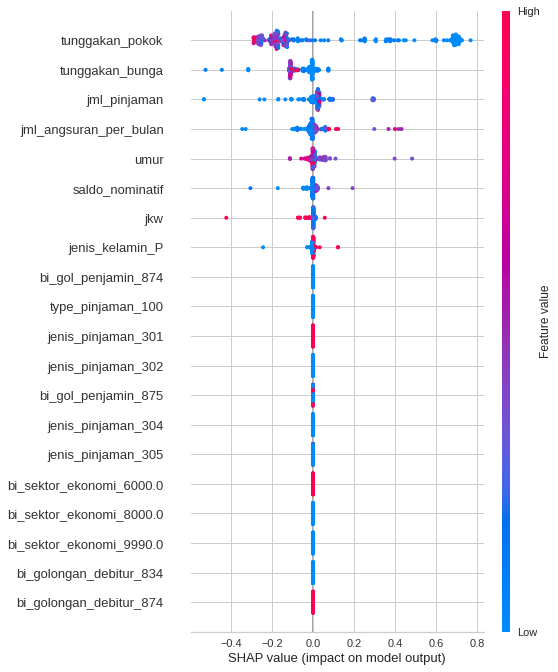

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [398]:
interpret_model(decision_tree_model)

semakin rendah tunggakan pokok, maka semakin lancar status kreditnya.

In [399]:
random_forest_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9811,1.0000,0.9286,1.0000,0.9630,0.9503,0.9515
1,0.9245,0.9835,0.7857,0.9167,0.8462,0.7965,0.8007
2,0.9623,0.9945,0.8571,1.0000,0.9231,0.8983,0.9030
3,0.9434,0.9899,0.8571,0.9231,0.8889,0.8510,0.8520
4,0.9623,0.9881,0.8571,1.0000,0.9231,0.8983,0.9030
5,0.9434,0.9853,0.8571,0.9231,0.8889,0.8510,0.8520
6,0.9623,0.9899,0.9286,0.9286,0.9286,0.9029,0.9029
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9811,1.0000,1.0000,0.9333,0.9655,0.9526,0.9536


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2273, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


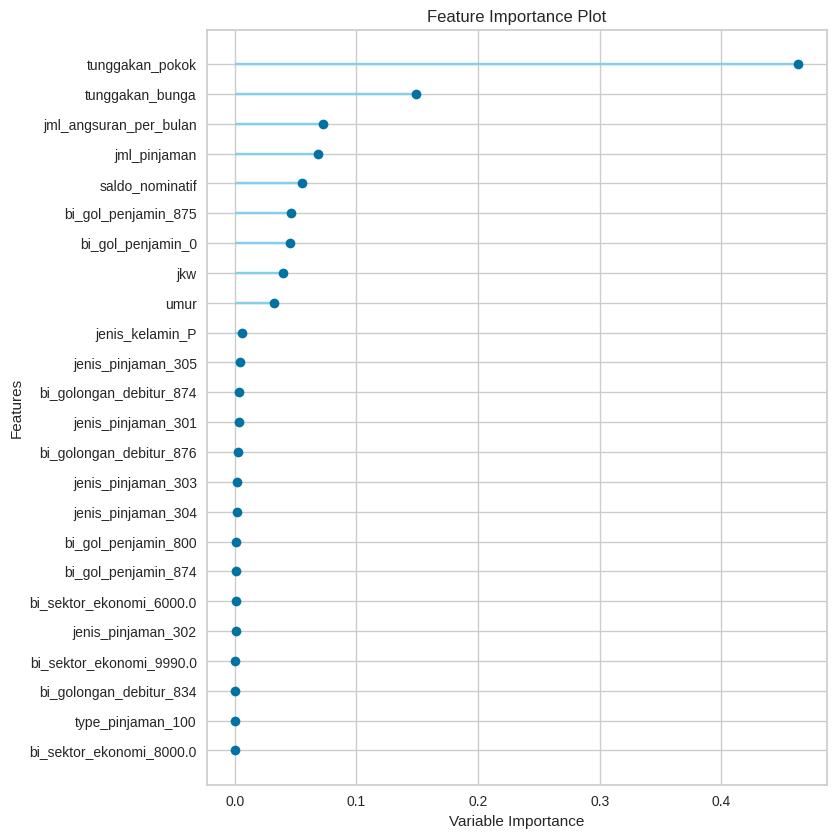

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [400]:
evaluate_model(random_forest_model)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2273, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


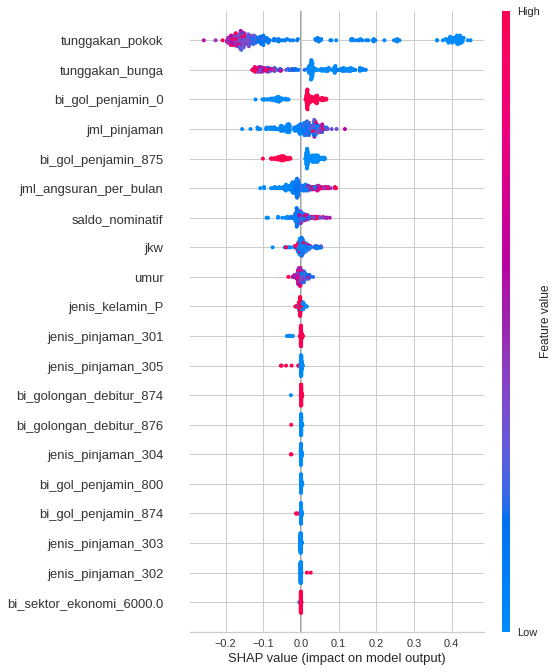

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [401]:
interpret_model(random_forest_model)

semakin rendah tunggakan pokok maka semakin lancar status kreditnya.